In [1]:



import numpy as np
from scipy import stats, interpolate, fft, linalg
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Cos_Transform_rect_med.gif


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done
Cos_Transform_rect_narrow.gif


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done
Cos_Transform_cos.gif


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done
Cos_Transform_sin.gif


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done
Cos_Transform_rect.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Cos_Transform_sinc.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Cos_Transform_exp.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Cos_Transform_gaussian.gif
Done
Done! Done! Done! Done! 


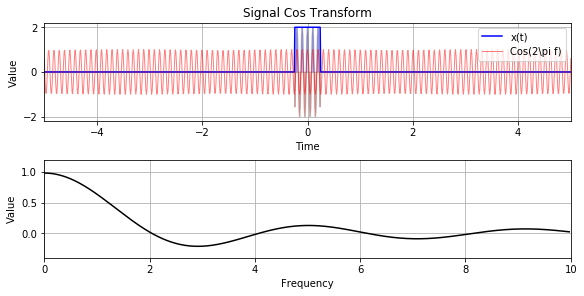

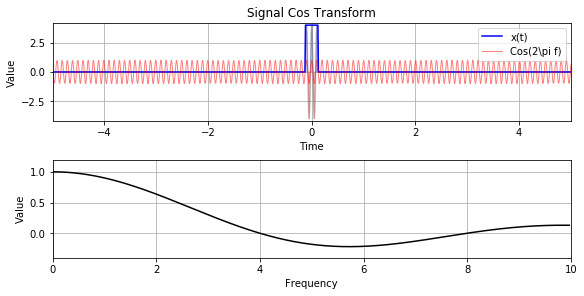

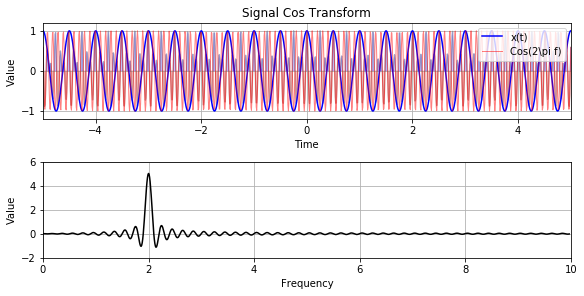

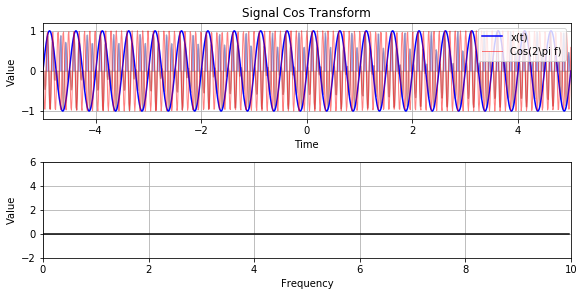

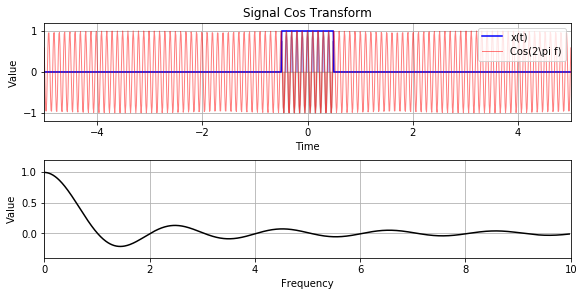

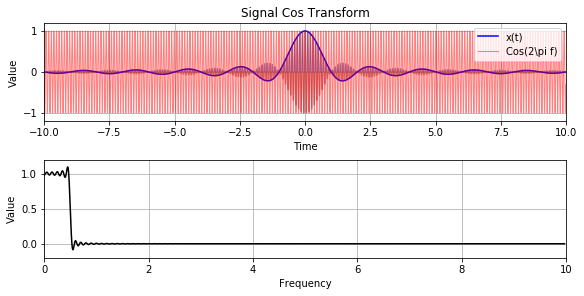

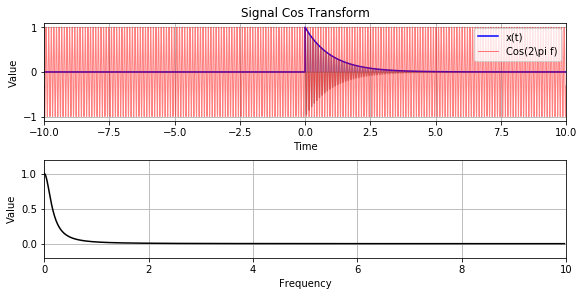

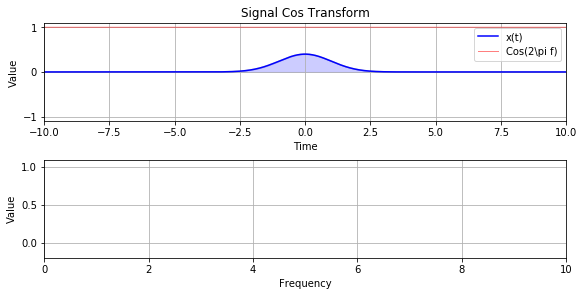

In [2]:



import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

sin = lambda x, center=0, f=1: np.sin(2*np.pi*f*x-center)
cos = lambda x, center=0, f=1: np.cos(2*np.pi*f*x-center)
rect = lambda x, center=0, width=1, hight=1.: hight*(np.abs(x-center)<width/2) 
exp = lambda x, center=0, lam=1, amp=1.: amp*np.exp(-lam*(x-center) )*(x-center>=0)
gaussian = lambda x, center=0, sigma=1, amp=1: amp*stats.norm.pdf( (x-center)/sigma )



def barker_code(t, center=0, expansion=13):
    t = t-center
    bc = np.array([+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1])
    t_n = np.arange(
        int(np.min(t)//1-2-len(bc)-expansion), 
        int(np.max(t)//1+2+len(bc)+expansion)
    )
    code = np.zeros_like(t_n)
    pos_zero = int(*np.where(t_n==0))
    code[pos_zero:pos_zero+13] = bc
    func_sig = interpolate.interp1d(t_n, code, kind='previous')
    sig = func_sig(t)
    return sig


def sinc(t, center=0):
    y = np.sinc(t-center)
    return y

frame_to_frequency = lambda n, total=200, start=0, stop=5: n/total * (stop-start) + start


def build_signal(x, sig, center=0, *args, **kwargs):
    if 'center' not in kwargs.keys():
        kwargs['center'] = center
    elif 'center' in kwargs.keys():
        kwargs['center'] += center
    y = sig(x, **kwargs)
    return y


def plot_sig_FT_Real_conv(t, x, filt, f, ft_x, f_upto, plt_lims, fig, gs, ax):
    ax1, ax2 = ax
    
    sig_product = x*filt
    
    ax1.cla()
    ax1.set_title('Signal Cos Transform')
    ax1.set_xlim(min(t), max(t))
    ax1.set_ylim(plt_lims['y1'])
    ax1.plot(t, sig_product, 'k', alpha=0.2) # label='f(t)Cos(2\pi f)'
    ax1.plot(t, x, 'b', label='x(t)')
    ax1.plot(t, filt, 'r', label=r'Cos(2\pi f)', lw=1, alpha=0.5)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.fill_between(t, sig_product, where=(sig_product>0), color='b', alpha=0.2)
    ax1.fill_between(t, sig_product, where=(sig_product<0), color='r', alpha=0.2)
    ax1.legend(loc='upper right')
    ax1.grid(True)
    #
    ax2.cla()
    ax2.set_title('')
    ax2.set_xlim((min(f), max(f)))
    ax2.set_ylim(plt_lims['y2'])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Value')
    ax2.plot(f[f<=f_upto], ft_x[f<=f_upto], 'k', label='')
    ax2.grid(True)




conv_func = {
    'rect_med': {
        'sig': rect, 'sig_kwargs': {'center': 0, 'width':0.5, 'hight':2},
        'x_params': (-5, 5, 1001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-2.2, 2.2), 'y2': (-0.4, 1.2)
        },
    },
    'rect_narrow': {
        'sig': rect, 'sig_kwargs': {'center': 0, 'width':0.25, 'hight':4},
        'x_params': (-5, 5, 1001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-4.2, 4.2), 'y2': (-0.4, 1.2)
        },
    },
    'cos': {
        'sig': cos, 'sig_kwargs': {'center': 0, 'f': 2},
        'x_params': (-5, 5, 1001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-2, 6)
        },
    },
    'sin': {
        'sig': sin, 'sig_kwargs': {'center': 0, 'f': 2},
        'x_params': (-5, 5, 1001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-2, 6)
        },
    },
    'rect': {
        'sig': rect, 'sig_kwargs': {'center': 0},
        'x_params': (-5, 5, 1001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-0.4, 1.2)
        },
    },
    'sinc': {
        'sig': sinc, 'sig_kwargs':{},
        'x_params':(-10, 10, 10001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-.2, 1.2),
        },
    },
    'exp': {
        'sig': exp, 'sig_kwargs':{},
        'x_params':(-10, 10, 10001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-1.1, 1.1), 'y2': (-0.2, 1.2),
        },
    },
    'gaussian': {
        'sig': gaussian, 'sig_kwargs':{},
        'x_params':(-10, 10, 10001), 'freq':(0, 10, 1001),
        'plt_lims': {
            'y1': (-1.1, 1.1), 'y2': (-0.2, 1.1),
        },
    },
    
}
    
total_frames = 400


for name, params in conv_func.items():
    file_name = 'Cos_Transform_'+name+'.gif'
    sig, sig_kwargs = params['sig'], params['sig_kwargs']
    x_params, freq_parms = params['x_params'], params['freq']
    plt_lims = params['plt_lims']
    
    t, freq = np.linspace(*x_params), np.linspace(*freq_parms)
    x = build_signal(t, sig, **sig_kwargs)
    filts = np.array([np.cos(2*np.pi*fq*t) for fq in freq])
    ft_x = np.array([np.dot(x, filt) for filt in filts])*(t[1]-t[0])
    
    fig = plt.figure(constrained_layout=True)
    fig.set_size_inches(8, 4)
    gs = fig.add_gridspec(4, 8)
    ax1 = fig.add_subplot(gs[0:2, :])
    ax2 = fig.add_subplot(gs[2:4, :])
    ax = (ax1, ax2)
        
    def plot_conv_animate(frame):
        f_upto = frame_to_frequency(
            frame, total=total_frames, start=freq_parms[0], 
            stop=freq_parms[1])
        #filt = np.cos(2*np.pi*f_upto*t)
        filt = filts[freq<=f_upto, :][-1, :]
        plot_sig_FT_Real_conv(t, x, filt, freq, ft_x, f_upto, plt_lims, fig, gs, ax)
    
    anim = FuncAnimation(fig, plot_conv_animate, frames=range(total_frames), interval=40, blit=False)
    
    print(file_name)
    anim.save(file_name)
    print('Done')
    
    
    
print('Done! '*4)

 'barker' : {
        'sig': barker_code, 'sig_kwargs':{'center': 0},
        'x_params':(-30, 30, 6001), 'expansion': 13,
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-1, 14)
        },
    },
    'rect_fat_rect': {
        'sig1': rect, 'sig1_kwargs': {'center': 0, 'width':2},
        'x_params': (-3, 3, 1001), 'expansion': 0.5,
        'plt_lims': {
            'y1': (-0.1, 1.1), 'y2': (-0.1, 1.1)
        },
    },
    'exp_exp': {
        'sig1':  exp, 'sig1_kwargs': {'center': 0},
        'sig2':  exp, 'sig2_kwargs': {},
        'x_params': (-5, 5, 1001), 'expansion': 0,
        'plt_lims': {
            'y1': (-0.1, 1.1), 'y2': (-0.1, 1.1)
        },
    },
    'rect_gaussian': {
        'sig1': rect, 'sig1_kwargs': {'center': 0},
        'sig2': gaussian, 'sig2_kwargs': {},
        'x_params': (-5, 5, 1001), 'expansion': 3,
        'plt_lims': {
            'y1': (-0.1, 1.1), 'y2': (-0.1, 1.1)
        },
    },
    'gaussian_gaussian': {
        'sig1': gaussian, 'sig1_kwargs': {'center': 0},
        'sig2': gaussian, 'sig2_kwargs': {},
        'x_params': (-5, 5, 1001), 'expansion': 3,
        'plt_lims': {
            'y1': (-0.1, 1.1), 'y2': (-0.1, 1.1)
        },
    },
   

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Cos_Transform_NF_sin.gif
Done
Done! Done! Done! Done! 


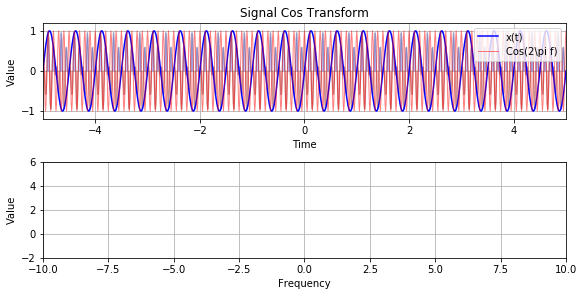

In [3]:



import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

sin = lambda x, center=0, f=1: np.sin(2*np.pi*f*x-center)
cos = lambda x, center=0, f=1: np.cos(2*np.pi*f*x-center)
rect = lambda x, center=0, width=1, hight=1.: hight*(np.abs(x-center)<width/2) 
exp = lambda x, center=0, lam=1, amp=1.: amp*np.exp(-lam*(x-center) )*(x-center>=0)
gaussian = lambda x, center=0, sigma=1, amp=1: amp*stats.norm.pdf( (x-center)/sigma )



def barker_code(t, center=0, expansion=13):
    t = t-center
    bc = np.array([+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1])
    t_n = np.arange(
        int(np.min(t)//1-2-len(bc)-expansion), 
        int(np.max(t)//1+2+len(bc)+expansion)
    )
    code = np.zeros_like(t_n)
    pos_zero = int(*np.where(t_n==0))
    code[pos_zero:pos_zero+13] = bc
    func_sig = interpolate.interp1d(t_n, code, kind='previous')
    sig = func_sig(t)
    return sig


def sinc(t, center=0):
    y = np.sinc(t-center)
    return y

frame_to_frequency = lambda n, total=200, start=0, stop=5: n/total * (stop-start) + start


def build_signal(x, sig, center=0, *args, **kwargs):
    if 'center' not in kwargs.keys():
        kwargs['center'] = center
    elif 'center' in kwargs.keys():
        kwargs['center'] += center
    y = sig(x, **kwargs)
    return y


def plot_sig_FT_Real_conv(t, x, filt, f, ft_x, f_upto, plt_lims, fig, gs, ax):
    ax1, ax2 = ax
    
    sig_product = x*filt
    
    ax1.cla()
    ax1.set_title('Signal Cos Transform')
    ax1.set_xlim(min(t), max(t))
    ax1.set_ylim(plt_lims['y1'])
    ax1.plot(t, sig_product, 'k', alpha=0.2) # label='f(t)Cos(2\pi f)'
    ax1.plot(t, x, 'b', label='x(t)')
    ax1.plot(t, filt, 'r', label=r'Cos(2\pi f)', lw=1, alpha=0.5)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.fill_between(t, sig_product, where=(sig_product>0), color='b', alpha=0.2)
    ax1.fill_between(t, sig_product, where=(sig_product<0), color='r', alpha=0.2)
    ax1.legend(loc='upper right')
    ax1.grid(True)
    #
    ax2.cla()
    ax2.set_title('')
    ax2.set_xlim((min(f), max(f)))
    ax2.set_ylim(plt_lims['y2'])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Value')
    ax2.plot(f[f<=f_upto], ft_x[f<=f_upto], 'k', label='')
    ax2.grid(True)




conv_func = {
#    'rect_med': {
#        'sig': rect, 'sig_kwargs': {'center': 0, 'width':0.5, 'hight':2},
#        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-2.2, 2.2), 'y2': (-0.4, 1.2)
#        },
#    },
#    'rect_narrow': {
#        'sig': rect, 'sig_kwargs': {'center': 0, 'width':0.25, 'hight':4},
#        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-4.2, 4.2), 'y2': (-0.4, 1.2)
#        },
#    },
#    'cos': {
#        'sig': cos, 'sig_kwargs': {'center': 0, 'f': 2},
#        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-1.2, 1.2), 'y2': (-2, 6)
#        },
#    },
    'sin': {
        'sig': sin, 'sig_kwargs': {'center': 0, 'f': 2},
        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 1001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-2, 6)
        },
    },
#    'rect': {
#        'sig': rect, 'sig_kwargs': {'center': 0},
#        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-1.2, 1.2), 'y2': (-0.4, 1.2)
#        },
#    },
#    'sinc': {
#        'sig': sinc, 'sig_kwargs':{},
#        'x_params':(-10, 10, 10001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-1.2, 1.2), 'y2': (-.2, 1.2),
#        },
#    },
#    'exp': {
#        'sig': exp, 'sig_kwargs':{},
#        'x_params':(-10, 10, 10001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-1.1, 1.1), 'y2': (-0.2, 1.2),
#        },
#    },
#    'gaussian': {
#        'sig': gaussian, 'sig_kwargs':{},
#        'x_params':(-10, 10, 10001), 'freq':(-10, 10, 2001),
#        'plt_lims': {
#            'y1': (-1.1, 1.1), 'y2': (-0.2, 1.1),
#        },
#    },
    
}
    
total_frames = 400


for name, params in conv_func.items():
    file_name = 'Cos_Transform_NF_'+name+'.gif'
    sig, sig_kwargs = params['sig'], params['sig_kwargs']
    x_params, freq_parms = params['x_params'], params['freq']
    plt_lims = params['plt_lims']
    
    t, freq = np.linspace(*x_params), np.linspace(*freq_parms)
    x = build_signal(t, sig, **sig_kwargs)
    filts = np.array([np.cos(2*np.pi*fq*t) for fq in freq])
    ft_x = np.array([np.dot(x, filt) for filt in filts])*(t[1]-t[0])
    
    fig = plt.figure(constrained_layout=True)
    fig.set_size_inches(8, 4)
    gs = fig.add_gridspec(4, 8)
    ax1 = fig.add_subplot(gs[0:2, :])
    ax2 = fig.add_subplot(gs[2:4, :])
    ax = (ax1, ax2)
        
    def plot_conv_animate(frame):
        f_upto = frame_to_frequency(
            frame, total=total_frames, start=freq_parms[0], 
            stop=freq_parms[1])
        #filt = np.cos(2*np.pi*f_upto*t)
        filt = filts[freq<=f_upto, :][-1, :]
        plot_sig_FT_Real_conv(t, x, filt, freq, ft_x, f_upto, plt_lims, fig, gs, ax)
    
    anim = FuncAnimation(fig, plot_conv_animate, frames=range(total_frames), interval=40, blit=False)
    
    print(file_name)
    anim.save(file_name)
    print('Done')
    
    
    
print('Done! '*4)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Fourier_Transform_rect_med.gif


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done
Fourier_Transform_rect_narrow.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Fourier_Transform_cos.gif


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done
Fourier_Transform_sin.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Fourier_Transform_rect.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Fourier_Transform_sinc.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Fourier_Transform_exp.gif
Done


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Fourier_Transform_gaussian.gif
Done
Done! Done! Done! Done! 


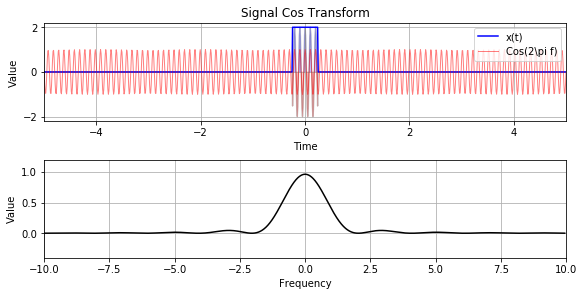

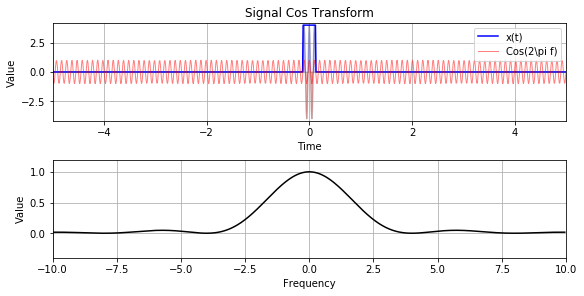

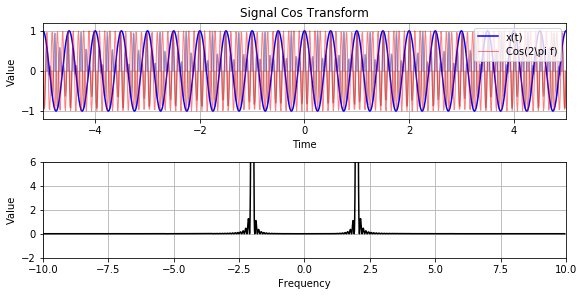

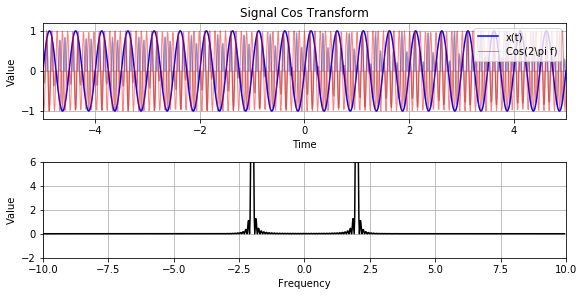

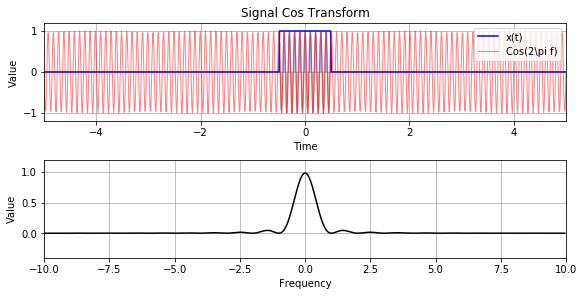

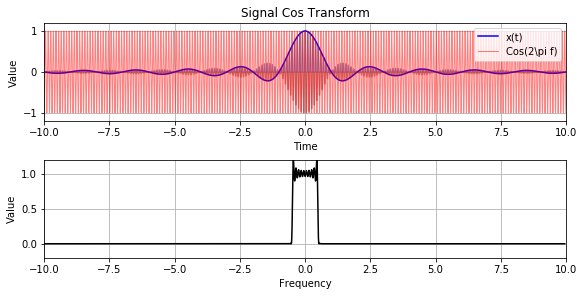

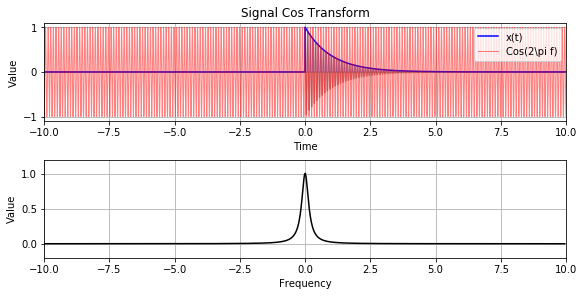

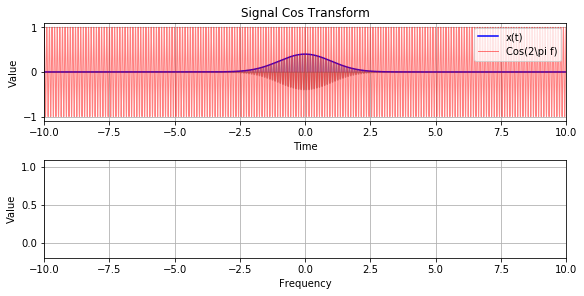

In [4]:



import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

sin = lambda x, center=0, f=1: np.sin(2*np.pi*f*x-center)
cos = lambda x, center=0, f=1: np.cos(2*np.pi*f*x-center)
ctone = lambda x, center=0, f=1: np.exp(1j*(2*np.pi*f*(x-center)))
rect = lambda x, center=0, width=1, hight=1.: hight*(np.abs(x-center)<width/2) 
exp = lambda x, center=0, lam=1, amp=1.: amp*np.exp(-lam*(x-center) )*(x-center>=0)
gaussian = lambda x, center=0, sigma=1, amp=1: amp*stats.norm.pdf( (x-center)/sigma )



def barker_code(t, center=0, expansion=13):
    t = t-center
    bc = np.array([+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1])
    t_n = np.arange(
        int(np.min(t)//1-2-len(bc)-expansion), 
        int(np.max(t)//1+2+len(bc)+expansion)
    )
    code = np.zeros_like(t_n)
    pos_zero = int(*np.where(t_n==0))
    code[pos_zero:pos_zero+13] = bc
    func_sig = interpolate.interp1d(t_n, code, kind='previous')
    sig = func_sig(t)
    return sig


def sinc(t, center=0):
    y = np.sinc(t-center)
    return y

frame_to_frequency = lambda n, total=200, start=0, stop=5: n/total * (stop-start) + start


def build_signal(x, sig, center=0, *args, **kwargs):
    if 'center' not in kwargs.keys():
        kwargs['center'] = center
    elif 'center' in kwargs.keys():
        kwargs['center'] += center
    y = sig(x, **kwargs)
    return y


def plot_sig_FT_Real_conv(t, x, filt, f, ft_x, f_upto, plt_lims, fig, gs, ax):
    ax1, ax2 = ax
    
    sig_product = x*filt
    
    ax1.cla()
    ax1.set_title('Signal Cos Transform')
    ax1.set_xlim(min(t), max(t))
    ax1.set_ylim(plt_lims['y1'])
    ax1.plot(t, sig_product, 'k', alpha=0.2) # label='f(t)Cos(2\pi f)'
    ax1.plot(t, x, 'b', label='x(t)')
    ax1.plot(t, filt, 'r', label=r'Cos(2\pi f)', lw=1, alpha=0.5)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.fill_between(t, sig_product, where=(sig_product>0), color='b', alpha=0.2)
    ax1.fill_between(t, sig_product, where=(sig_product<0), color='r', alpha=0.2)
    ax1.legend(loc='upper right')
    ax1.grid(True)
    #
    ax2.cla()
    ax2.set_title('')
    ax2.set_xlim((min(f), max(f)))
    ax2.set_ylim(plt_lims['y2'])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Magnitude^2')
    ax2.plot(f[f<=f_upto], ft_x[f<=f_upto], 'k', label='')
    ax2.grid(True)




conv_func = {
    'rect_med': {
        'sig': rect, 'sig_kwargs': {'center': 0, 'width':0.5, 'hight':2},
        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-2.2, 2.2), 'y2': (-0.4, 1.2)
        },
    },
    'rect_narrow': {
        'sig': rect, 'sig_kwargs': {'center': 0, 'width':0.25, 'hight':4},
        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-4.2, 4.2), 'y2': (-0.4, 1.2)
        },
    },
    'cos': {
        'sig': cos, 'sig_kwargs': {'center': 0, 'f': 2},
        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-2, 28)
        },
    },
    'sin': {
        'sig': sin, 'sig_kwargs': {'center': 0, 'f': 2},
        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 1001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-2, 28)
        },
    },
    'rect': {
        'sig': rect, 'sig_kwargs': {'center': 0},
        'x_params': (-5, 5, 1001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-0.4, 1.2)
        },
    },
    'sinc': {
        'sig': sinc, 'sig_kwargs':{},
        'x_params':(-10, 10, 10001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-1.2, 1.2), 'y2': (-.2, 1.2),
        },
    },
    'exp': {
        'sig': exp, 'sig_kwargs':{},
        'x_params':(-10, 10, 10001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-1.1, 1.1), 'y2': (-0.2, 1.2),
        },
    },
    'gaussian': {
        'sig': gaussian, 'sig_kwargs':{},
        'x_params':(-10, 10, 10001), 'freq':(-10, 10, 2001),
        'plt_lims': {
            'y1': (-1.1, 1.1), 'y2': (-0.2, 1.1),
        },
    },
    
}
    
total_frames = 400


for name, params in conv_func.items():
    file_name = 'Fourier_Transform_'+name+'.gif'
    sig, sig_kwargs = params['sig'], params['sig_kwargs']
    x_params, freq_parms = params['x_params'], params['freq']
    plt_lims = params['plt_lims']
    
    t, freq = np.linspace(*x_params), np.linspace(*freq_parms)
    x = build_signal(t, sig, **sig_kwargs)
    filts = np.array([ctone(t, f=-fq) for fq in freq])
    ft_x = np.array([np.dot(x, filt) for filt in filts])*(t[1]-t[0])
    
    fig = plt.figure(constrained_layout=True)
    fig.set_size_inches(8, 4)
    gs = fig.add_gridspec(4, 8)
    ax1 = fig.add_subplot(gs[0:2, :])
    ax2 = fig.add_subplot(gs[2:4, :])
    ax = (ax1, ax2)
        
    def plot_conv_animate(frame):
        f_upto = frame_to_frequency(
            frame, total=total_frames, start=freq_parms[0], 
            stop=freq_parms[1])
        #filt = np.cos(2*np.pi*f_upto*t)
        filt = filts[freq<=f_upto, :][-1, :]
        plot_sig_FT_Real_conv(t, x, np.real(filt), freq, np.abs(ft_x)**2, f_upto, plt_lims, fig, gs, ax)
    
    anim = FuncAnimation(fig, plot_conv_animate, frames=range(total_frames), interval=40, blit=False)
    
    print(file_name)
    anim.save(file_name)
    print('Done')
    
    
print('Done! '*4)